In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler

In [2]:
%config IPCompleter.greedy=True
#%config NotebookApp.iopub_data_rate_limit=1.0e10

In [3]:
data = open('/home/shobhit/NewDataset/UCI HAR Dataset/train/X_train.txt')
data_label =  open('/home/shobhit/NewDataset/UCI HAR Dataset/train/y_train.txt')

In [4]:
lines = data.readlines()
len(lines)

7352

In [5]:
lines[1]

'  2.7841883e-001 -1.6410568e-002 -1.2352019e-001 -9.9824528e-001 -9.7530022e-001 -9.6032199e-001 -9.9880719e-001 -9.7491437e-001 -9.5768622e-001 -9.4306751e-001 -5.5785126e-001 -8.1840869e-001  8.4930787e-001  6.8584458e-001  8.2263681e-001 -9.8193011e-001 -9.9999130e-001 -9.9978838e-001 -9.9840537e-001 -9.9915036e-001 -9.7786550e-001 -9.4822478e-001 -7.1489166e-001 -5.0093000e-001 -5.7097906e-001  6.1162716e-001 -3.2954862e-001  2.8421321e-001  2.8459454e-001  1.1570542e-001 -9.0962529e-002  2.9431041e-001 -2.8121057e-001  8.5988430e-002 -2.2152694e-002 -1.6656535e-002 -2.2064350e-001 -1.3428663e-002 -7.2691890e-002  5.7938169e-001  9.6656113e-001 -1.4155127e-001  1.0937881e-001 -9.9741134e-001 -9.8944741e-001 -9.3163868e-001 -9.9788359e-001 -9.8961366e-001 -9.3324040e-001  8.9206031e-001 -1.6134256e-001  1.2258573e-001  9.8452014e-001 -1.1489334e-001  1.0276411e-001 -3.8342955e-001  9.0782890e-001 -9.7058275e-001 -9.7850045e-001 -9.9918838e-001 -9.9002851e-001 -9.4168540e-001 -1.000

In [6]:
new_lines=[]
for i,line in enumerate(lines):
    temp = line.strip('\n')
    temp = temp.strip('  ')
    temp = re.sub("\s+",",",temp.strip())
    a=[float(e) for e in temp.split(',')]
    new_lines.append(a)

In [7]:
z=np.array(new_lines)
z.shape

(7352, 561)

In [8]:
label_lines=data_label.readlines()

In [9]:
len(label_lines)

7352

In [10]:
label_lines[1]

'5\n'

In [11]:
new_label_lines=[]
for i,line in enumerate(label_lines):
    temp = line.strip('\n')
    a=[int(e)-1 for e in temp.split(',')]
    new_label_lines.append(a[0])

In [12]:
true_labels = np.array(new_label_lines)
#true_labels=true_labels.T

In [13]:
true_labels.shape

(7352,)

In [14]:
#pca = PCA(n_components=4)
#pca.fit(z)

In [15]:
#print(pca.explained_variance_ratio_)

In [16]:
#sample = pca.transform(z)
scale=StandardScaler()
scale.fit(z)
sample=scale.transform(z)

**Elbow using Cosine distance**

In [17]:
homogenity={}
K = range(1,10)
for k in K :
    homogenity[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    print(labels)
    print(true_labels)
    #print(sample_transformed)
    homogenity[k]= homogeneity_score(true_labels,labels)
    print("score ="+str(homogenity[k]))

[0 0 0 ... 0 0 0]
[4 4 4 ... 1 1 1]
score =-3.111825880605261e-16
[0 0 0 ... 1 1 1]
[4 4 4 ... 1 1 1]
score =0.37632749365294793
[1 1 1 ... 2 2 2]
[4 4 4 ... 1 1 1]
score =0.39731065519769654
[1 1 1 ... 3 3 3]
[4 4 4 ... 1 1 1]
score =0.40145545737879135
[1 1 1 ... 0 0 0]
[4 4 4 ... 1 1 1]
score =0.4145022862220334
[5 5 5 ... 2 2 2]
[4 4 4 ... 1 1 1]
score =0.5414599432332188
[0 0 0 ... 2 2 2]
[4 4 4 ... 1 1 1]
score =0.5437703270272665
[3 3 3 ... 2 2 2]
[4 4 4 ... 1 1 1]
score =0.5739415857440853
[7 7 7 ... 8 8 8]
[4 4 4 ... 1 1 1]
score =0.5861973634834651


In [19]:
SSE_array=[]
slope=[]
for key,value in homogenity.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,9):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+1,s])
#slope

[-3.111825880605261e-16, 0.37632749365294793, 0.39731065519769654, 0.40145545737879135, 0.4145022862220334, 0.5414599432332188, 0.5437703270272665, 0.5739415857440853, 0.5861973634834651]


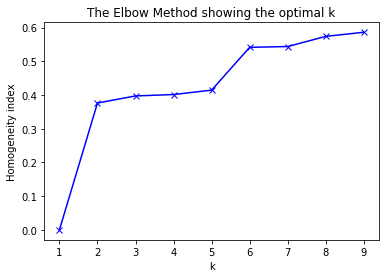

In [20]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('Homogeneity index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
slope

[[2, 0.37632749365294826],
 [3, 0.020983161544748608],
 [4, 0.004144802181094809],
 [5, 0.013046828843242042],
 [6, 0.1269576570111854],
 [7, 0.002310383794047688],
 [8, 0.030171258716818805],
 [9, 0.012255777739379803]]

In [22]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,7):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope < 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 3
Optimal Number of Clusters = 4
Optimal Number of Clusters = 6
